<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt

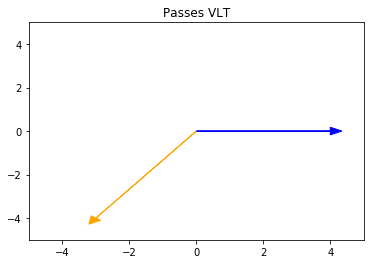

In [0]:
v1 = [-3,-4]
v2 = [4,0]

plt.arrow(0,0, v1[0], v1[1],head_width=.35, head_length=0.35, color ='orange')
plt.arrow(0,0, v2[0], v2[1],head_width=.35, head_length=0.35, color ='blue')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Passes VLT")
plt.show()

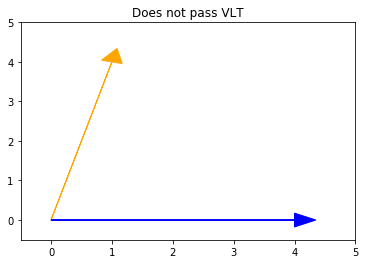

In [0]:
v1 = [1,4]
v2 = [4,0]

plt.arrow(0,0, v1[0], v1[1],head_width=.35, head_length=0.35, color ='orange')
plt.arrow(0,0, v2[0], v2[1],head_width=.35, head_length=0.35, color ='blue')
plt.xlim(-.5,5)          
plt.ylim(-.5,5)
plt.title('Does not pass VLT')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function is only considered valid if the vertical line touches no more than one point of the graphed function at a time as it passes through



# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2, it is the only one with all unique input values and doesn't fail the vertical line test

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The dimensionality of the first one is R^3 to R^3

The dimensionality of the second one is R^4 to R^2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

f(x) = (x,x)

R to R^2

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [0]:
import numpy as np

In [0]:
P = [4,4]
p1 = [16, 4]
PT = [[1,3], [2,-1]]

ptot = np.matmul(PT, P)
ptot

array([16,  4])

In [0]:
QT = [[4,1,2], [2,-1,3],[5,-2,1]]
q1 = [2,3,4]
q = [19, 13, 8]

qtot = np.matmul(QT, q1)
qtot

array([19, 13,  8])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

refer above in 4.1

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors and eigenvalues exist in pairs and help to represent the data from different angles. The vectors represent a direction and the values represent  how spread the data is. The number of value/vector pairs equals the number of dimensions the dataset has. The vector stays stationary and can only be scaled.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

It is really difficult to spatially comprehend what a more-than-3 dimensional representation would look like, and creating the representations would take up alot of space.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 times the number of paramaters you are using


# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [0]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [0]:
X = [df['sepal_length'],df['petal_length']]

In [0]:
means = mean(X, axis = 1)
means

array([5.84333333, 3.75866667])

In [0]:
std_devs = np.std(X, axis = 1)
std_devs

array([0.82530129, 1.75852918])

In [0]:
z = (X-mean(X)) - std(X)
z

In [0]:
cov_matrix = cov(z)
cov_matrix

array([[0.68569351, 1.27368233],
       [1.27368233, 3.11317942]])

In [0]:
values, vectors = eig(cov_matrix)
print(values)
vectors

[0.1400506  3.65882233]


array([[-0.91920275, -0.39378459],
       [ 0.39378459, -0.91920275]])

In [0]:
projected = vectors.dot(X)
projected

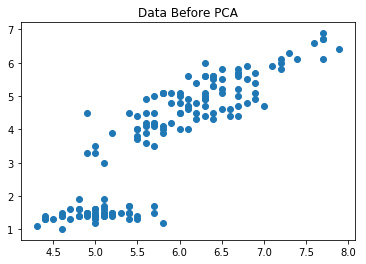

In [0]:
plt.scatter(df['sepal_length'], df['petal_length'])
plt.title("Data Before PCA")
plt.show()

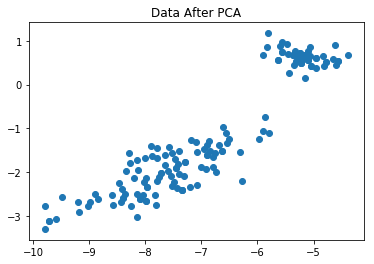

In [0]:
plt.scatter(projected[0], projected[1])
plt.title("Data After PCA")
plt.show()

In [0]:
pca = PCA(2)
pca.fit(z)
print(pca.components_)
print(pca.explained_variance_)

In [0]:
B = pca.transform(X)
B

array([[-84.94905676,   2.50047459],
       [-55.99478247,   2.50047459]])

In [0]:
plt.scatter(B[0],B[1])
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)